### IMPORT LIBRARIES

In [88]:
# IPython Display Settings (for Jupyter Notebooks only)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# General Warnings Configuration
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Core Libraries
import pandas as pd
import numpy as np
import math
from collections import Counter
import pickle

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Preprocessing & Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE


### DATA PREPARATION

In [89]:
df = pd.read_csv(r'C:\Users\Daiwi\OneDrive\Desktop\cart_abandonment\data\data_cart_abandonment.csv')

In [90]:
df.shape

(4284, 13)

In [91]:
df.dtypes

ID                            object
Is_Product_Details_viewed     object
Session_Activity_Count         int64
No_Items_Added_InCart        float64
No_Items_Removed_FromCart      int64
No_Cart_Viewed               float64
No_Checkout_Confirmed          int64
No_Checkout_Initiated          int64
No_Cart_Items_Viewed           int64
No_Customer_Login              int64
No_Page_Viewed                 int64
Customer_Segment_Type          int64
Cart_Abandoned                 int64
dtype: object

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         4284 non-null   object 
 1   Is_Product_Details_viewed  4284 non-null   object 
 2   Session_Activity_Count     4284 non-null   int64  
 3   No_Items_Added_InCart      4275 non-null   float64
 4   No_Items_Removed_FromCart  4284 non-null   int64  
 5   No_Cart_Viewed             4275 non-null   float64
 6   No_Checkout_Confirmed      4284 non-null   int64  
 7   No_Checkout_Initiated      4284 non-null   int64  
 8   No_Cart_Items_Viewed       4284 non-null   int64  
 9   No_Customer_Login          4284 non-null   int64  
 10  No_Page_Viewed             4284 non-null   int64  
 11  Customer_Segment_Type      4284 non-null   int64  
 12  Cart_Abandoned             4284 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage:

In [93]:
display(df.isnull().sum())

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        9
No_Items_Removed_FromCart    0
No_Cart_Viewed               9
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

### HANDLING MISSING VALUES, ENCODING, DROPPING UNWANTED COLUMNS

In [94]:
# Handle missing values by filling with the mean
df['No_Items_Added_InCart'] = df['No_Items_Added_InCart'].fillna(df['No_Items_Added_InCart'].mean())
df['No_Cart_Viewed'] = df['No_Cart_Viewed'].fillna(df['No_Cart_Viewed'].mean())

# Encode
df['Is_Product_Details_viewed'] = df['Is_Product_Details_viewed'].map({'Yes': 1, 'No': 0})

# Drop 'ID' column
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)

display(df.head())
display(df.isnull().sum())


,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,1,4,1.0,0,0.0,0,0,1,0,0,0,1
1,0,38,0.0,0,2.0,0,0,2,0,2,0,1
2,0,8,5.0,0,0.0,1,1,1,0,0,1,0
3,0,6,0.0,0,2.0,0,0,4,0,0,0,1
4,1,31,14.0,12,1.0,0,0,4,0,0,2,1


Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        0
No_Items_Removed_FromCart    0
No_Cart_Viewed               0
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64

In [95]:
df.describe()

,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
count,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,0.282446,13.878151,3.488421,0.867180,1.444211,0.187208,0.980159,2.295985,0.169234,2.348506,0.563259,0.856209
std,0.450242,15.934084,6.782264,3.070022,2.080307,0.517691,1.140525,6.052666,0.400299,2.868862,0.703856,0.350918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,0.000000,10.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,17.000000,5.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
max,1.000000,436.000000,225.000000,50.000000,34.000000,11.000000,14.000000,256.000000,3.000000,35.000000,2.000000,1.000000


## DATA ANALYSIS

### CART ABANDONMENT

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Cart_Abandoned'>

Text(0.5, 1.0, 'Cart Abandonment Distribution')

Text(0.5, 0, 'Cart Abandoned (1) vs Not Abandoned (0)')

Text(0, 0.5, 'Number of Sessions')

Text(0, 3718, '3668')

Text(1, 666, '616')

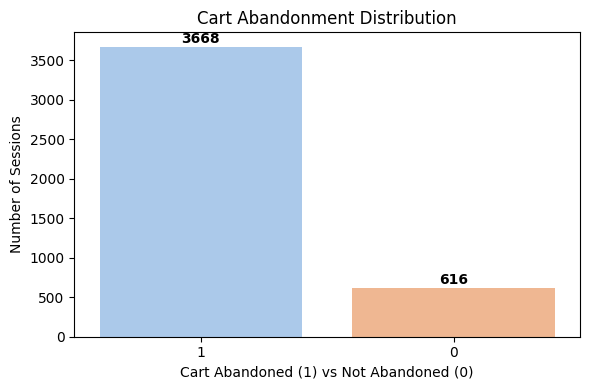

In [96]:
abandon_counts = df['Cart_Abandoned'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=abandon_counts.index.astype(str), y=abandon_counts.values, hue=abandon_counts.index.astype(str), palette='pastel', legend=False)
plt.title("Cart Abandonment Distribution")
plt.xlabel("Cart Abandoned (1) vs Not Abandoned (0)")
plt.ylabel("Number of Sessions")
for i, val in enumerate(abandon_counts.values):
    plt.text(i, val + 50, str(val), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

### FEATURE DISTRIBUTIONS

array([[<Axes: title={'center': 'Is_Product_Details_viewed'}>,
        <Axes: title={'center': 'Session_Activity_Count'}>,
        <Axes: title={'center': 'No_Items_Added_InCart'}>],
       [<Axes: title={'center': 'No_Items_Removed_FromCart'}>,
        <Axes: title={'center': 'No_Cart_Viewed'}>,
        <Axes: title={'center': 'No_Checkout_Confirmed'}>],
       [<Axes: title={'center': 'No_Checkout_Initiated '}>,
        <Axes: title={'center': 'No_Cart_Items_Viewed'}>,
        <Axes: title={'center': 'No_Customer_Login'}>],
       [<Axes: title={'center': 'No_Page_Viewed'}>,
        <Axes: title={'center': 'Customer_Segment_Type'}>,
        <Axes: title={'center': 'Cart_Abandoned'}>]], dtype=object)

Text(0.5, 1.02, 'Feature Distributions')

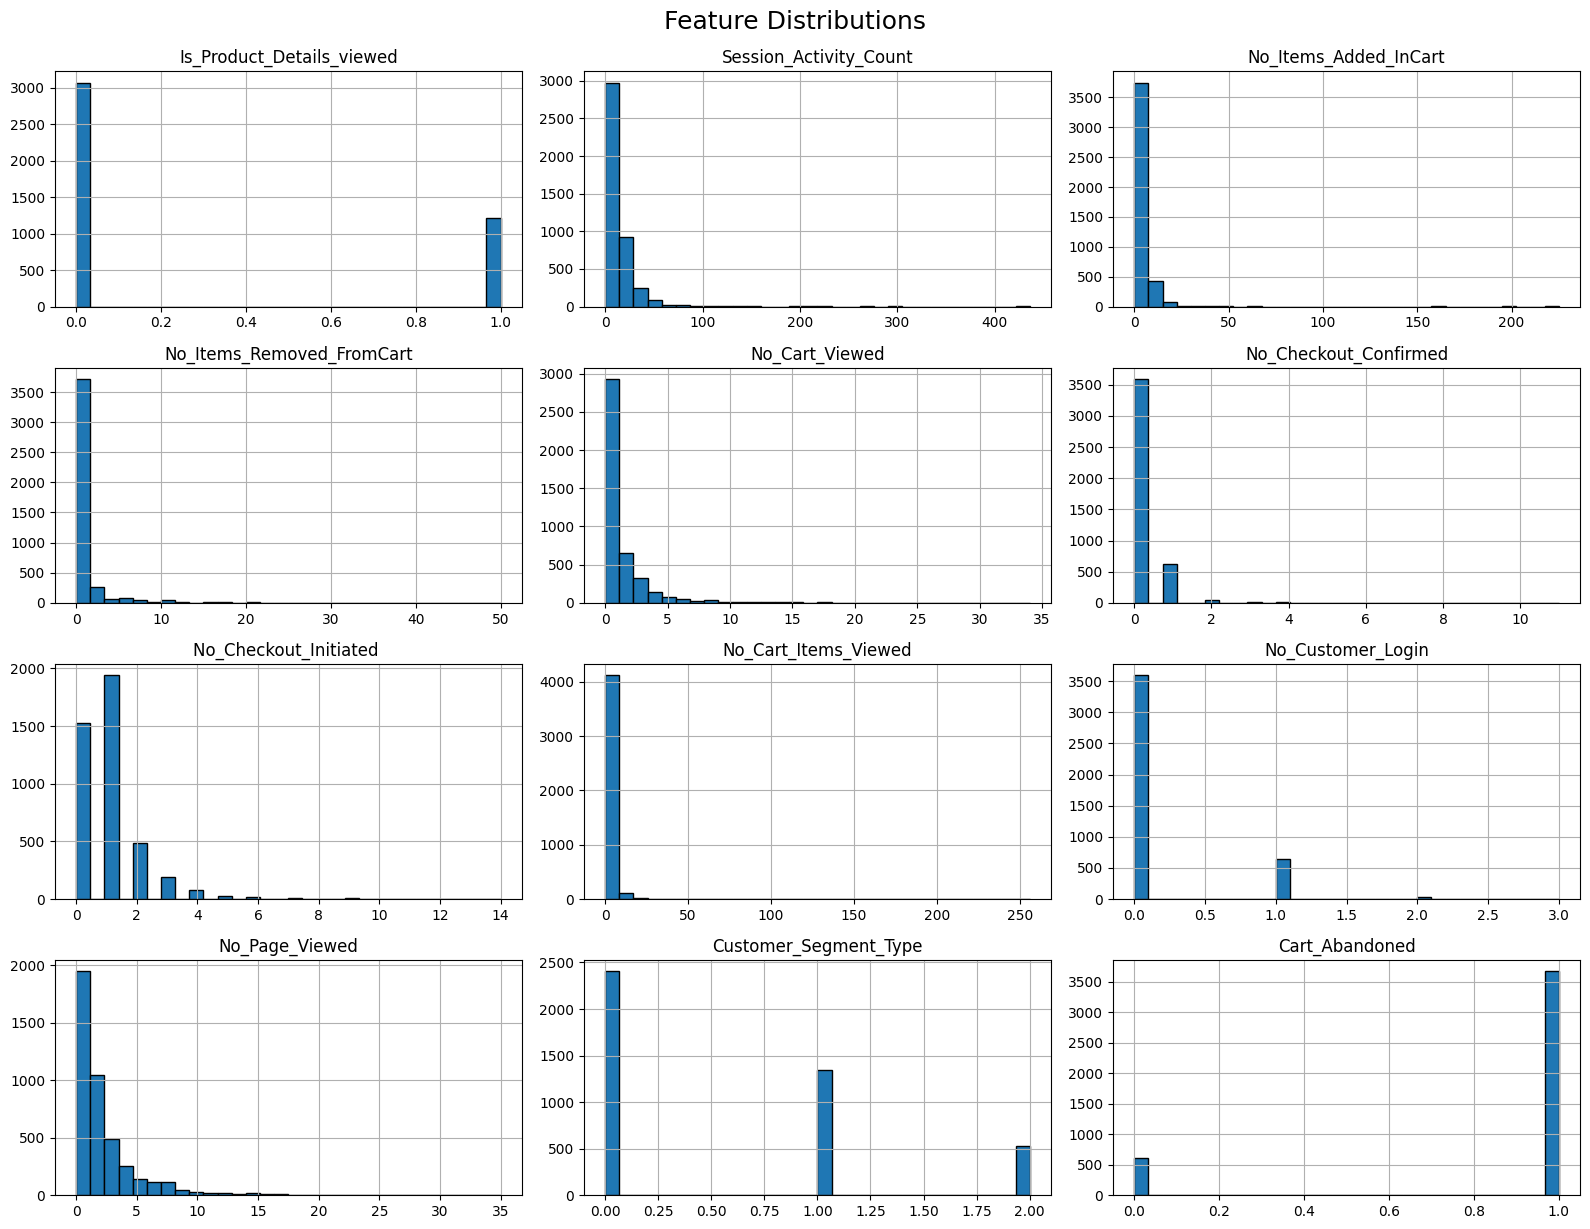

In [97]:
df.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=18, y=1.02)
plt.show()


### OUTLIERS REMOVAL USING IQR METHOD

In [98]:
df.columns = df.columns.str.strip()

def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

outlier_columns = [
    'Session_Activity_Count',
    'No_Items_Added_InCart',
    'No_Items_Removed_FromCart',
    'No_Cart_Viewed',
    'No_Checkout_Confirmed',
    'No_Checkout_Initiated',
    'No_Cart_Items_Viewed',
    'No_Page_Viewed'
]

cleaned_df = cap_outliers_iqr(df.copy(), outlier_columns)


<Axes: xlabel='Session_Activity_Count'>

Text(0.5, 1.0, 'Before Capping: Session_Activity_Count')

<Axes: xlabel='Session_Activity_Count'>

Text(0.5, 1.0, 'After Capping: Session_Activity_Count')

<Axes: xlabel='No_Items_Added_InCart'>

Text(0.5, 1.0, 'Before Capping: No_Items_Added_InCart')

<Axes: xlabel='No_Items_Added_InCart'>

Text(0.5, 1.0, 'After Capping: No_Items_Added_InCart')

<Axes: xlabel='No_Items_Removed_FromCart'>

Text(0.5, 1.0, 'Before Capping: No_Items_Removed_FromCart')

<Axes: xlabel='No_Items_Removed_FromCart'>

Text(0.5, 1.0, 'After Capping: No_Items_Removed_FromCart')

<Axes: xlabel='No_Cart_Viewed'>

Text(0.5, 1.0, 'Before Capping: No_Cart_Viewed')

<Axes: xlabel='No_Cart_Viewed'>

Text(0.5, 1.0, 'After Capping: No_Cart_Viewed')

<Axes: xlabel='No_Checkout_Confirmed'>

Text(0.5, 1.0, 'Before Capping: No_Checkout_Confirmed')

<Axes: xlabel='No_Checkout_Confirmed'>

Text(0.5, 1.0, 'After Capping: No_Checkout_Confirmed')

<Axes: xlabel='No_Checkout_Initiated'>

Text(0.5, 1.0, 'Before Capping: No_Checkout_Initiated')

<Axes: xlabel='No_Checkout_Initiated'>

Text(0.5, 1.0, 'After Capping: No_Checkout_Initiated')

<Axes: xlabel='No_Cart_Items_Viewed'>

Text(0.5, 1.0, 'Before Capping: No_Cart_Items_Viewed')

<Axes: xlabel='No_Cart_Items_Viewed'>

Text(0.5, 1.0, 'After Capping: No_Cart_Items_Viewed')

<Axes: xlabel='No_Page_Viewed'>

Text(0.5, 1.0, 'Before Capping: No_Page_Viewed')

<Axes: xlabel='No_Page_Viewed'>

Text(0.5, 1.0, 'After Capping: No_Page_Viewed')

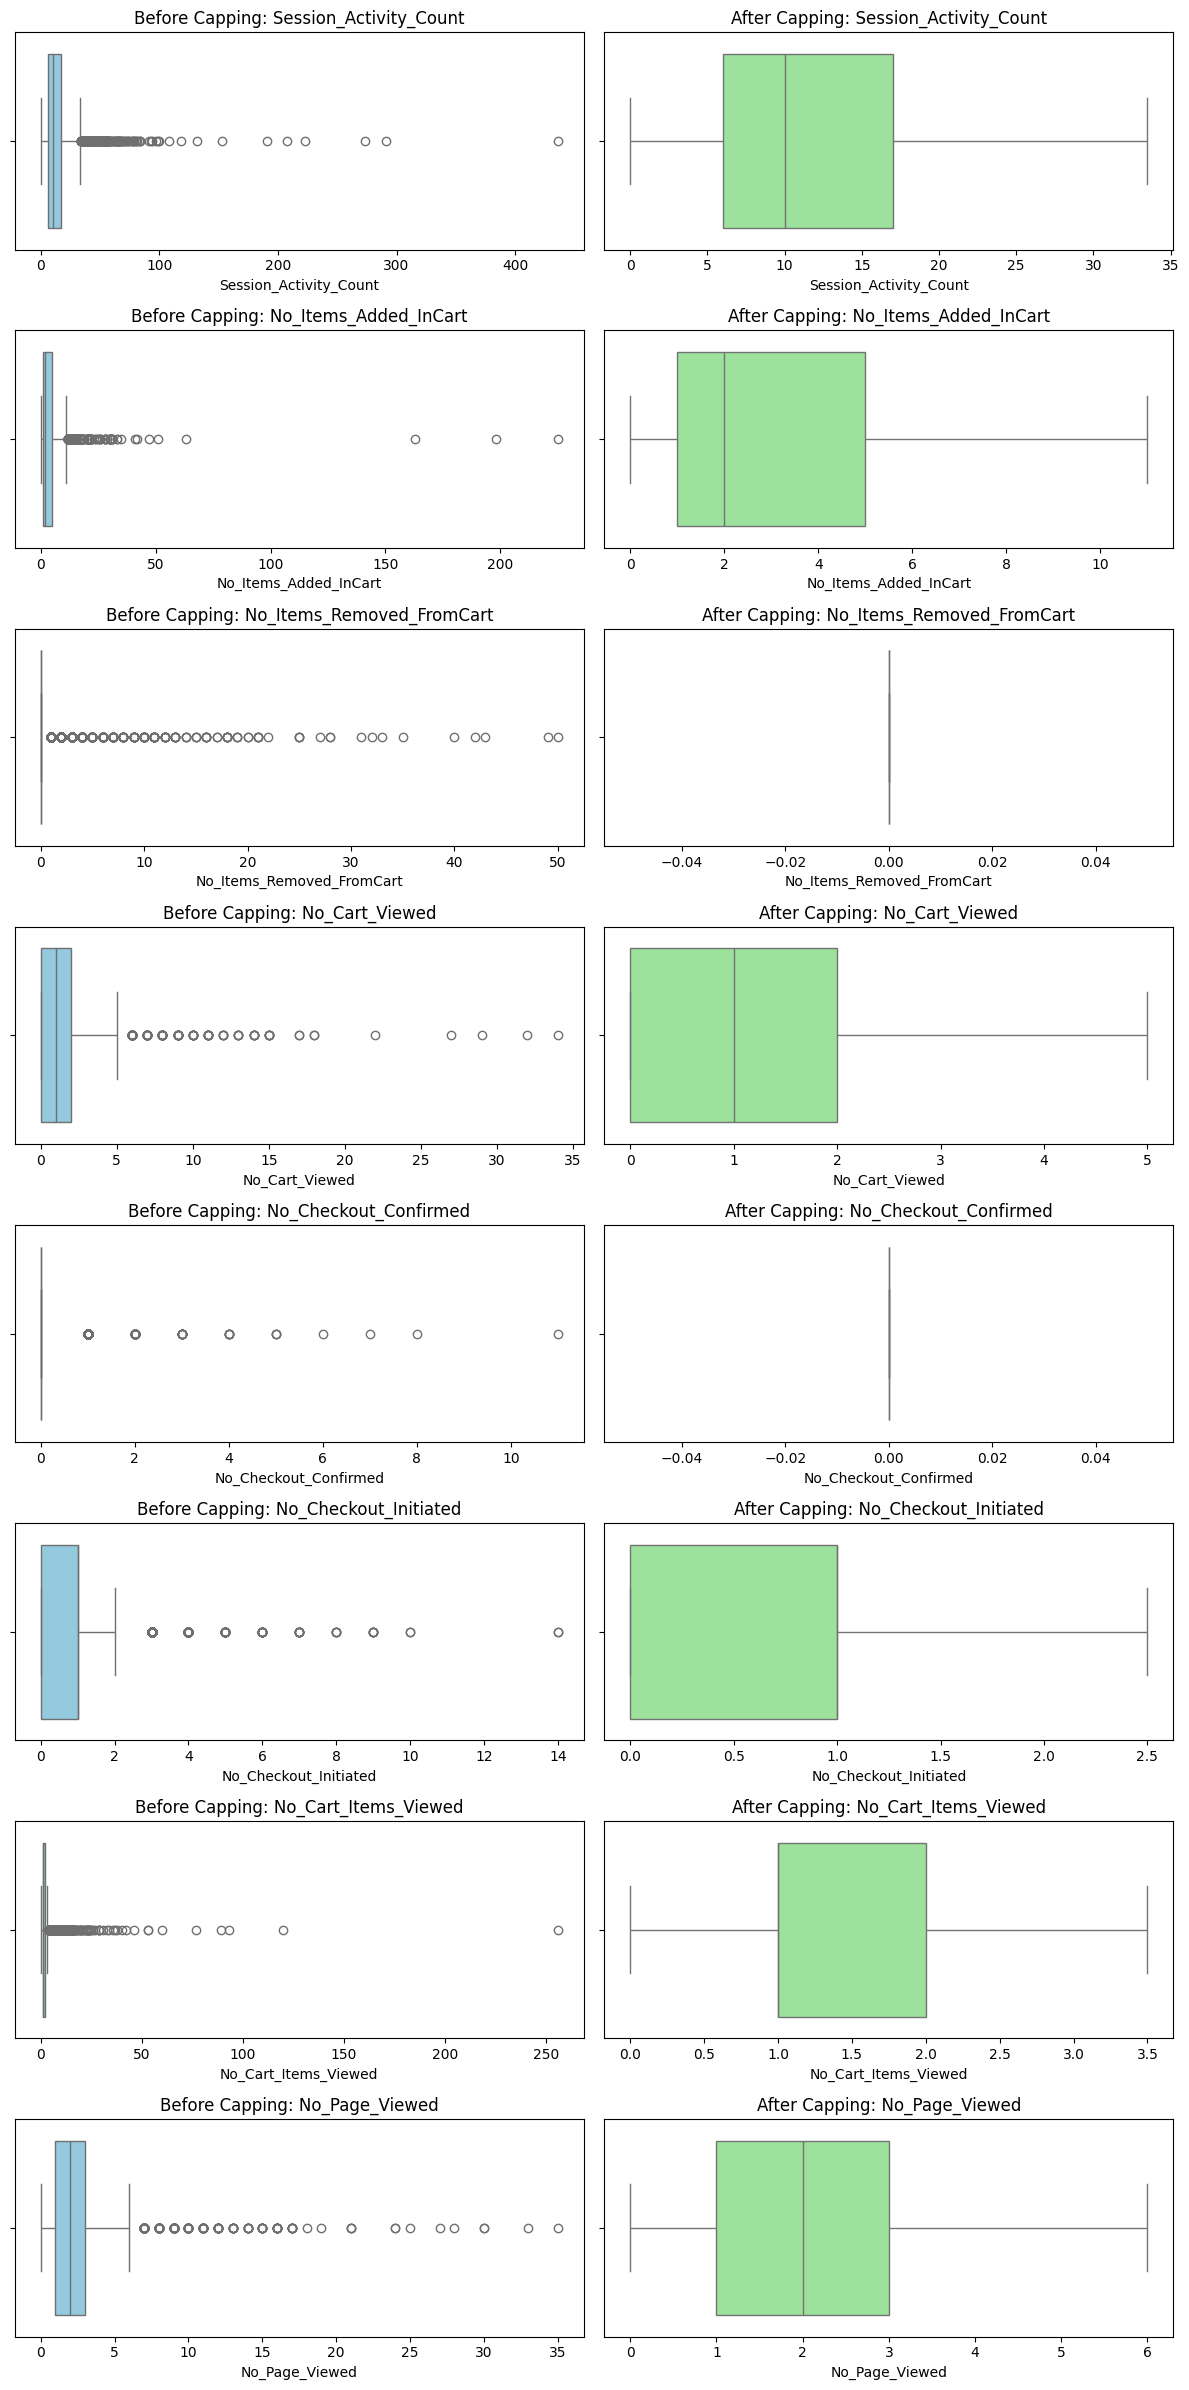

In [99]:
fig, axes = plt.subplots(len(outlier_columns), 2, figsize=(12, len(outlier_columns) * 3))
for i, col in enumerate(outlier_columns):
    sns.boxplot(data=df, x=col, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Before Capping: {col}')
    sns.boxplot(data=cleaned_df, x=col, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'After Capping: {col}')
plt.tight_layout()
plt.show()

### CORRELATION

<Figure size 1200x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Feature Correlation Heatmap')

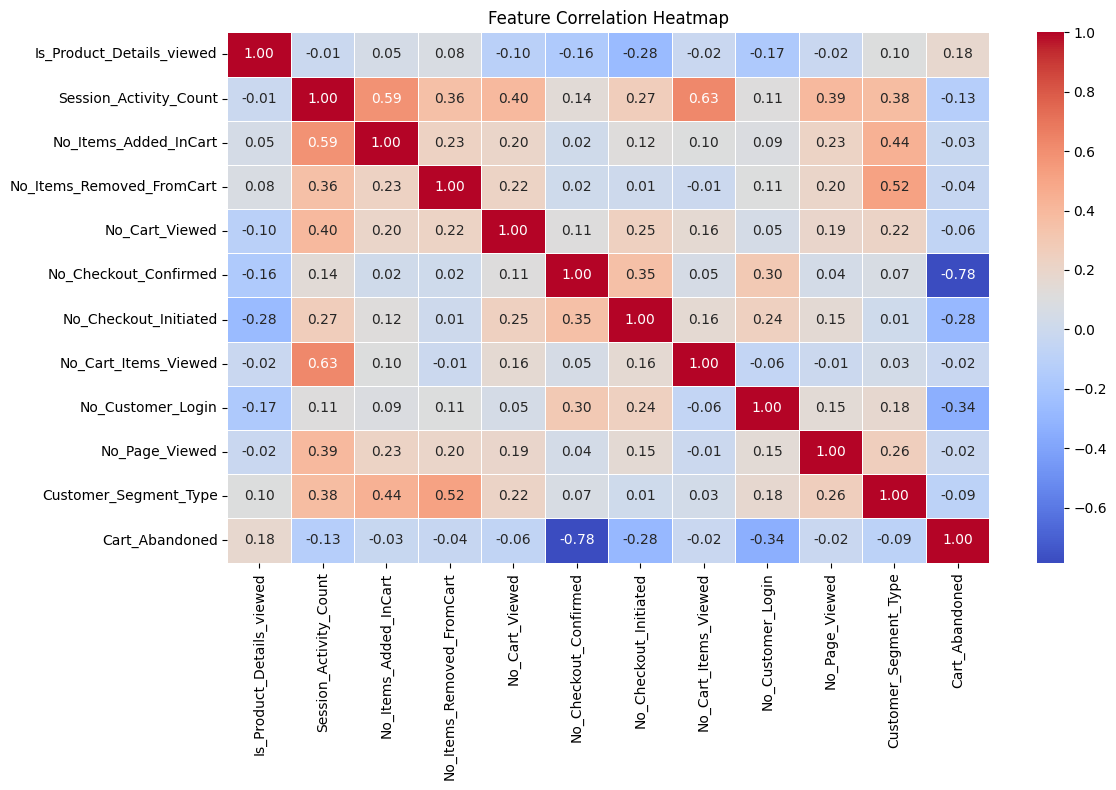

In [100]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


## FEATURE SELECTION

### SELECTION USING CORRELATION WITH TARGET VARIABLE

In [101]:
X = df.drop(columns=['Cart_Abandoned'])
y = df['Cart_Abandoned']
feature_names = X.columns

# Correlation with target
correlations = df.corr(numeric_only=True)['Cart_Abandoned'].drop('Cart_Abandoned')
correlation_df = correlations.abs().sort_values(ascending=False).reset_index()
correlation_df.columns = ['Feature', 'Correlation_with_Target']

print("Features Sorted by Correlation with Target:\n", correlation_df)


Features Sorted by Correlation with Target:
                       Feature  Correlation_with_Target
0       No_Checkout_Confirmed                 0.784854
1           No_Customer_Login                 0.340321
2       No_Checkout_Initiated                 0.284812
3   Is_Product_Details_viewed                 0.181743
4      Session_Activity_Count                 0.126398
5       Customer_Segment_Type                 0.088887
6              No_Cart_Viewed                 0.064225
7   No_Items_Removed_FromCart                 0.036586
8       No_Items_Added_InCart                 0.030130
9        No_Cart_Items_Viewed                 0.024807
10             No_Page_Viewed                 0.020483


### SELECTION USING RANDOM FOREST

In [102]:
# Random Forest Feature Importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'RF_Importance': rf.feature_importances_
}).sort_values(by='RF_Importance', ascending=False)
rf_importance = rf_importance.reset_index(drop=True)

print("\nRandom Forest Feature Importance:\n", rf_importance)

RandomForestClassifier(random_state=42)


Random Forest Feature Importance:
                       Feature  RF_Importance
0       No_Checkout_Confirmed       0.725647
1           No_Customer_Login       0.059978
2      Session_Activity_Count       0.051692
3       No_Checkout_Initiated       0.043104
4              No_Page_Viewed       0.027496
5       No_Items_Added_InCart       0.026874
6        No_Cart_Items_Viewed       0.018590
7              No_Cart_Viewed       0.018533
8   Is_Product_Details_viewed       0.011059
9   No_Items_Removed_FromCart       0.010486
10      Customer_Segment_Type       0.006541


In [103]:
combined = pd.merge(
    correlation_df,  
    rf_importance,   
    on='Feature'
).sort_values(by='RF_Importance', ascending=False).reset_index(drop=True)

display(combined)


,Feature,Correlation_with_Target,RF_Importance
0,No_Checkout_Confirmed,0.784854,0.725647
1,No_Customer_Login,0.340321,0.059978
2,Session_Activity_Count,0.126398,0.051692
3,No_Checkout_Initiated,0.284812,0.043104
4,No_Page_Viewed,0.020483,0.027496
5,No_Items_Added_InCart,0.030130,0.026874
6,No_Cart_Items_Viewed,0.024807,0.018590
7,No_Cart_Viewed,0.064225,0.018533
8,Is_Product_Details_viewed,0.181743,0.011059
9,No_Items_Removed_FromCart,0.036586,0.010486


In [104]:
selected_features = [
    'No_Checkout_Confirmed',
    'No_Customer_Login',
    'Session_Activity_Count',
    'No_Checkout_Initiated',
    'No_Page_Viewed',
    'No_Items_Added_InCart'
]

X = df[selected_features]
y = df['Cart_Abandoned']  


### TRAIN-TEST SPLIT AND SMOTE IMPLEMENTATION


In [105]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Apply SMOTE 
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Cart_Abandoned', ylabel='count'>

Text(0.5, 1.0, 'Class Distribution After SMOTE')

Text(0.5, 0, 'Class')

Text(0, 0.5, 'Count')

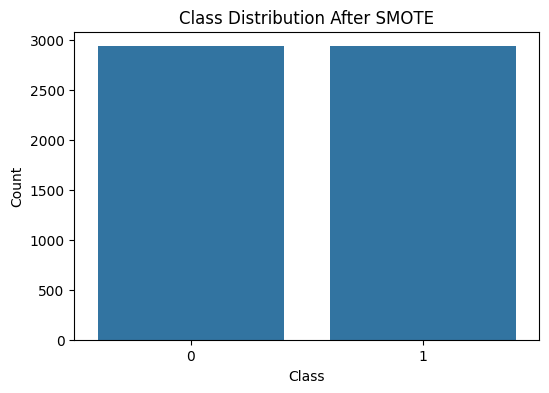

After SMOTE: Counter({1: 2934, 0: 2934})


In [106]:
# AFTER SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_sm)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print("After SMOTE:", Counter(y_train_sm))


### TRAINING MODELS (LOGISTIC REGRESSION, RANDOM FOREST, XGBOOST

In [107]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_sm, y_train_sm)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_sm, y_train_sm)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting (XGBoost)
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_sm, y_train_sm)
y_pred_xgb = xgb_model.predict(X_test)





LogisticRegression()

RandomForestClassifier(random_state=42)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

### EVALUATION

In [108]:
def evaluate_model(name, y_true, y_pred):
    print(f"\nEvaluation Report for {name}")
    print("Accuracy       :", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


Evaluation Report for Logistic Regression
Accuracy       : 0.9813302217036173
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       123
           1       1.00      0.98      0.99       734

    accuracy                           0.98       857
   macro avg       0.94      0.99      0.96       857
weighted avg       0.98      0.98      0.98       857


Evaluation Report for Random Forest
Accuracy       : 0.9754959159859977
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       123
           1       0.99      0.98      0.99       734

    accuracy                           0.98       857
   macro avg       0.94      0.97      0.95       857
weighted avg       0.98      0.98      0.98       857


Evaluation Report for XGBoost
Accuracy       : 0.9813302217036173
Classification Report:
               precision    recall  f1-score   support



### ACCURACY

<Figure size 800x500 with 0 Axes>

Text(0.0, 0.9913302217036173, '0.9813')

Text(1.0, 0.9854959159859977, '0.9755')

Text(2.0, 0.9913302217036173, '0.9813')

(0.0, 1.05)

Text(0, 0.5, 'Accuracy')

Text(0.5, 1.0, 'Model Accuracy Comparison')

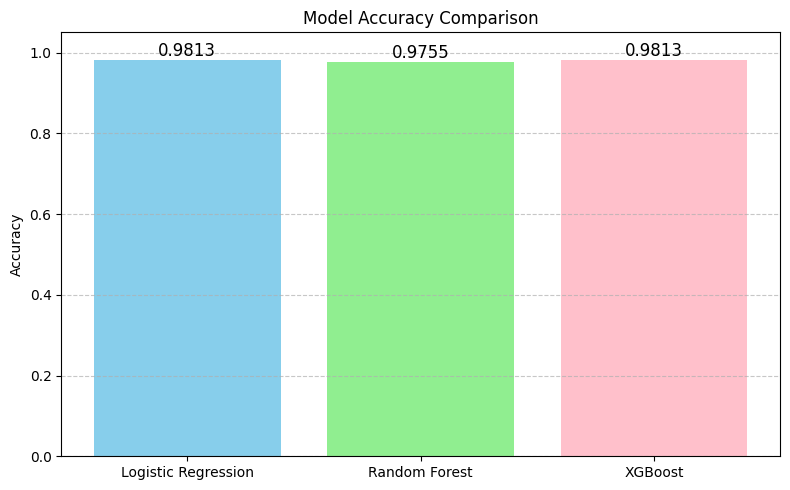

In [109]:
# Compute accuracy for each model
log_acc = accuracy_score(y_test, lr_model.predict(X_test))
rf_acc = accuracy_score(y_test, rf_model.predict(X_test))
xgb_acc = accuracy_score(y_test, xgb_model.predict(X_test))


accuracies = {
    "Logistic Regression": log_acc,
    "Random Forest": rf_acc,
    "XGBoost": xgb_acc
}

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'pink'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.4f}", ha='center', fontsize=12)

plt.ylim(0, 1.05)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### SAVE TRAINED MODELS

In [112]:
# Save Logistic Regression Model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# Save Random Forest Model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

# Save Gradient Boosting Model
with open('xg_boosting_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

